In [29]:
import pandas as pd
import numpy as np

## (a)
為auto資料新增一欄位'mpg01'，當該列mpg大於mpg中位數則為1，否則為0。

In [30]:
auto = pd.read_csv(r"C:\Users\user\Desktop\機器學習助教\Auto.csv")

In [31]:
auto.info()
auto['horsepower'] = auto['horsepower'].astype('float64', errors='ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [32]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [33]:
auto['mpg01'] = np.where(auto['mpg'] > np.median(auto['mpg']), 1, 0)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


## (b)
我們繪製出變數之間的散佈圖，還有基於mpg01所製作的boxplot，從中可以發現'weight'基本為與mpg01關係最為明顯之變數(不同mpg01下weight差異明顯)，另外還有'displacement'、 'acceleration'也是較有關係之變數(與mpg有相關性)，適合用來預測mpg01。

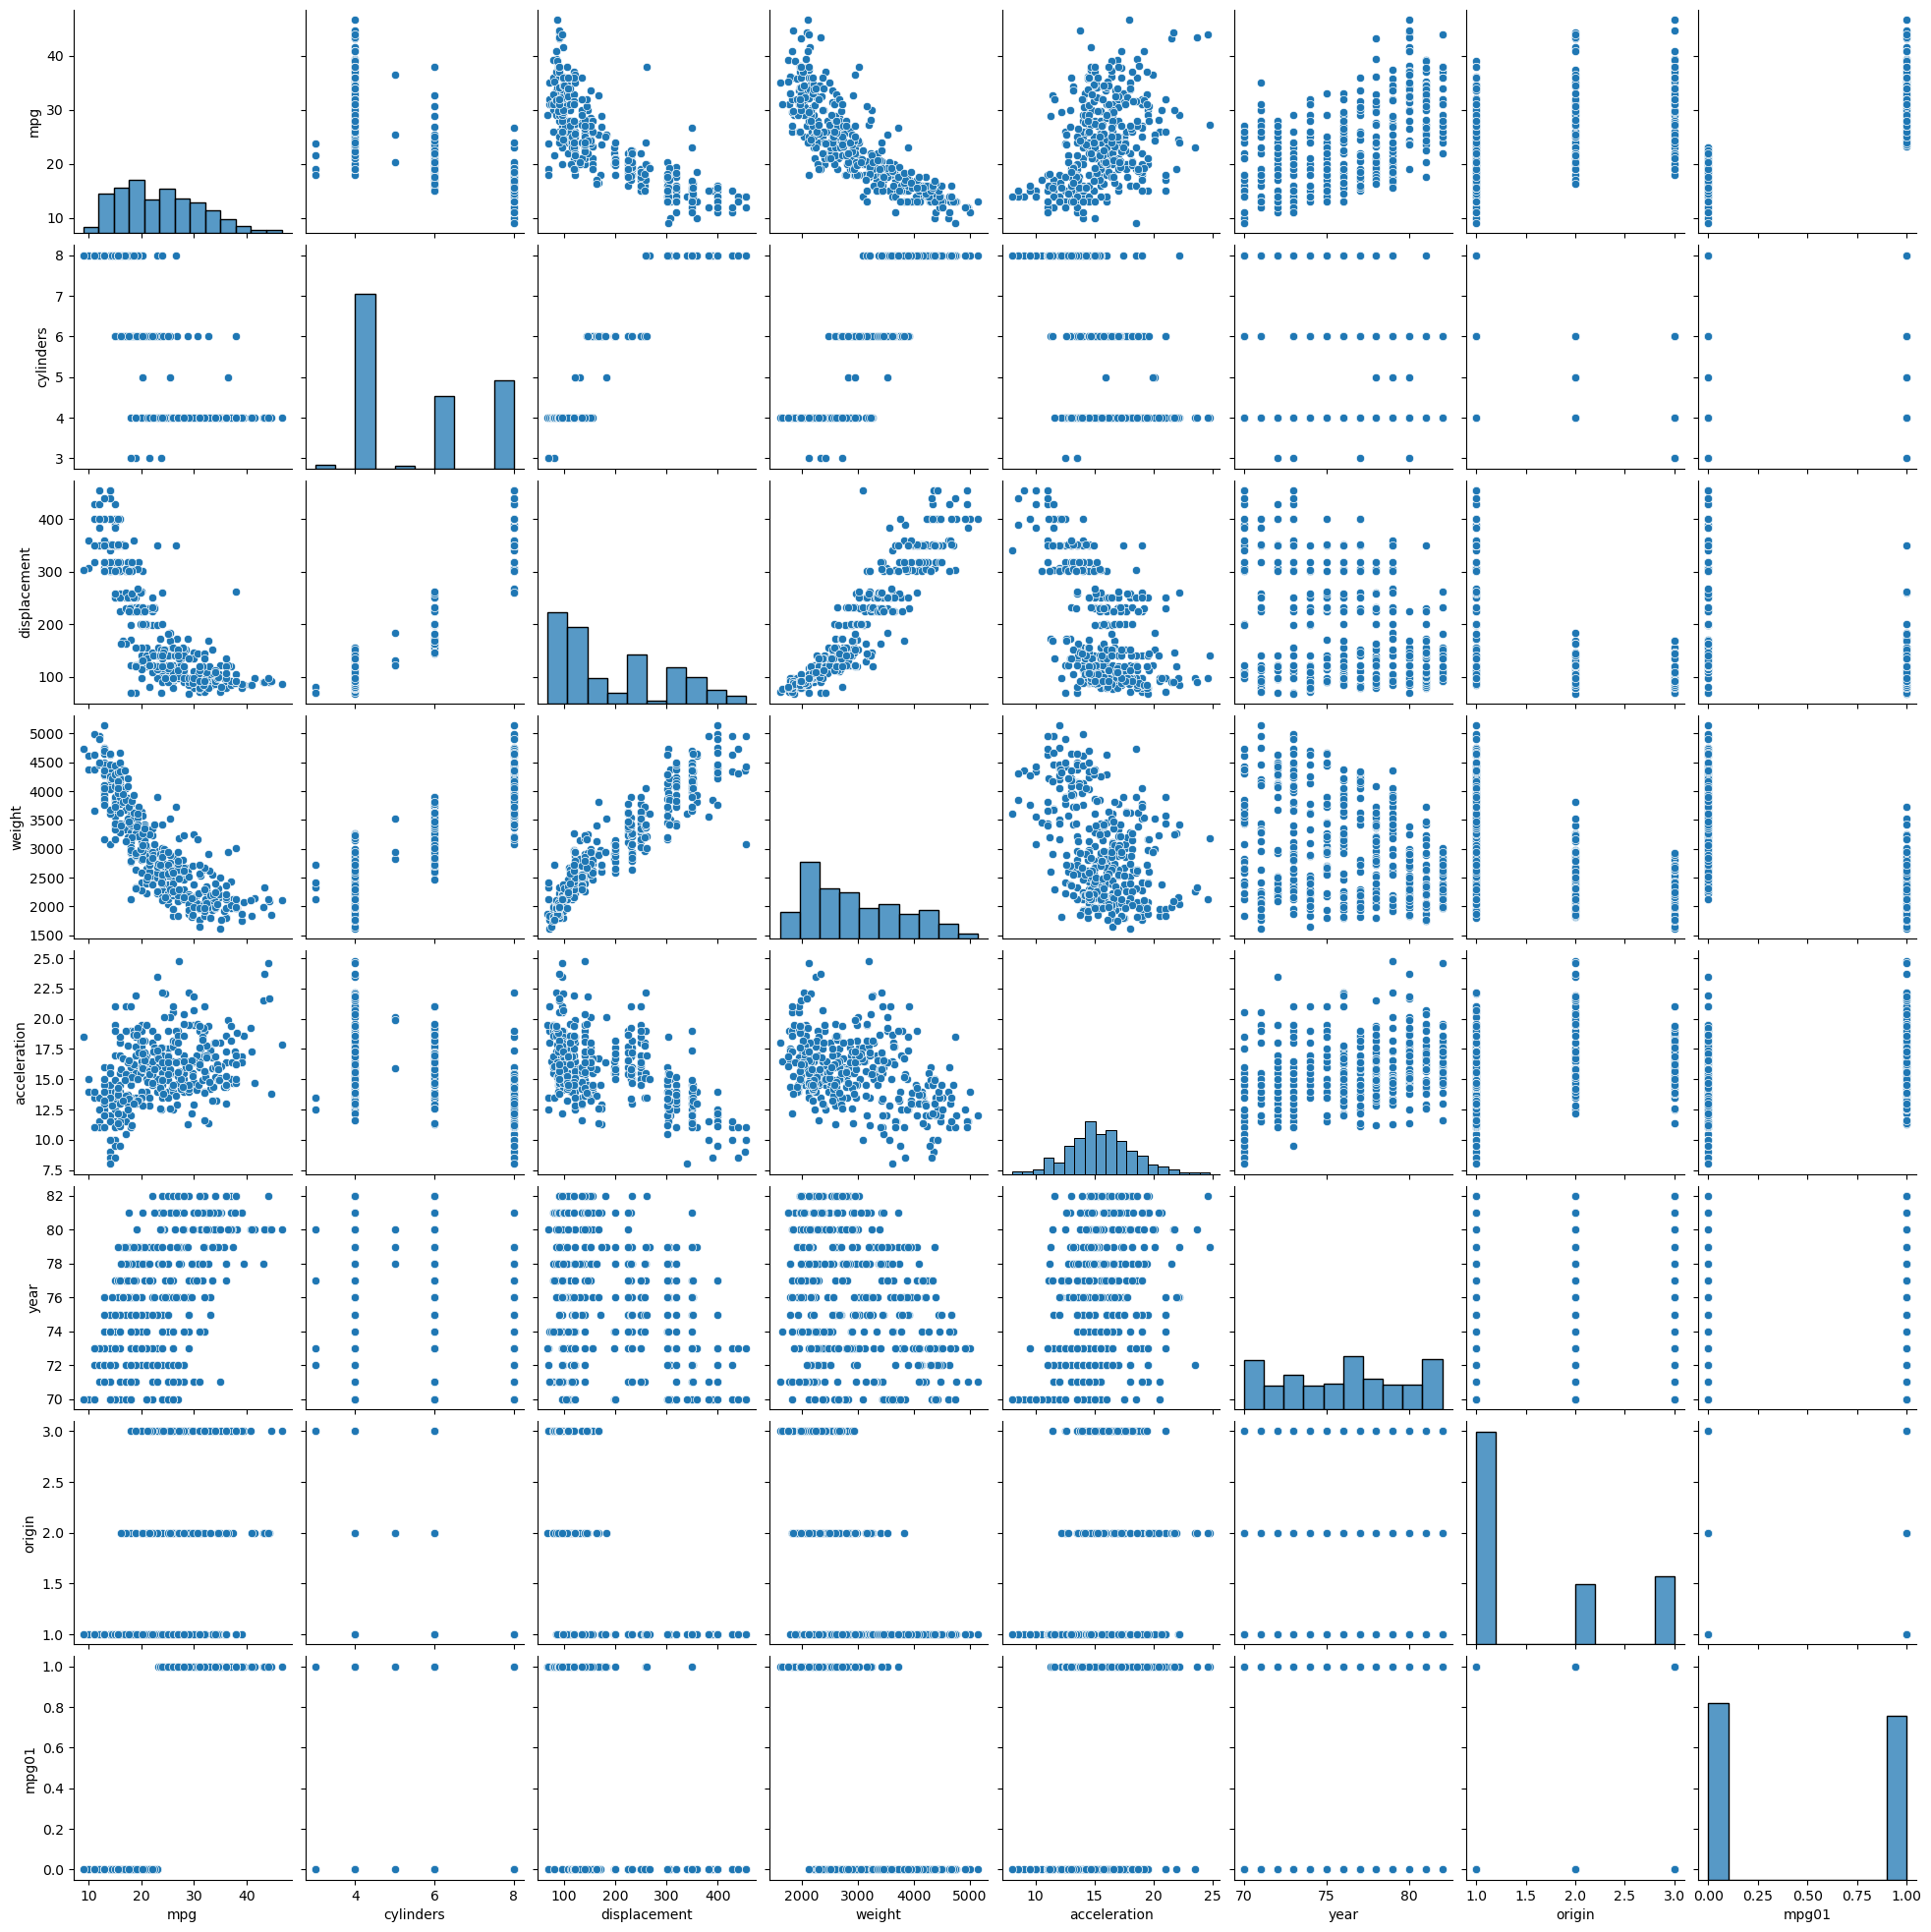

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(auto)
plt.show()

In [35]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'mpg01'],
      dtype='object')

In [36]:
feature = ['cylinders', 'displacement', 'horsepower', 'weight' ,'acceleration', 'year', 'origin']

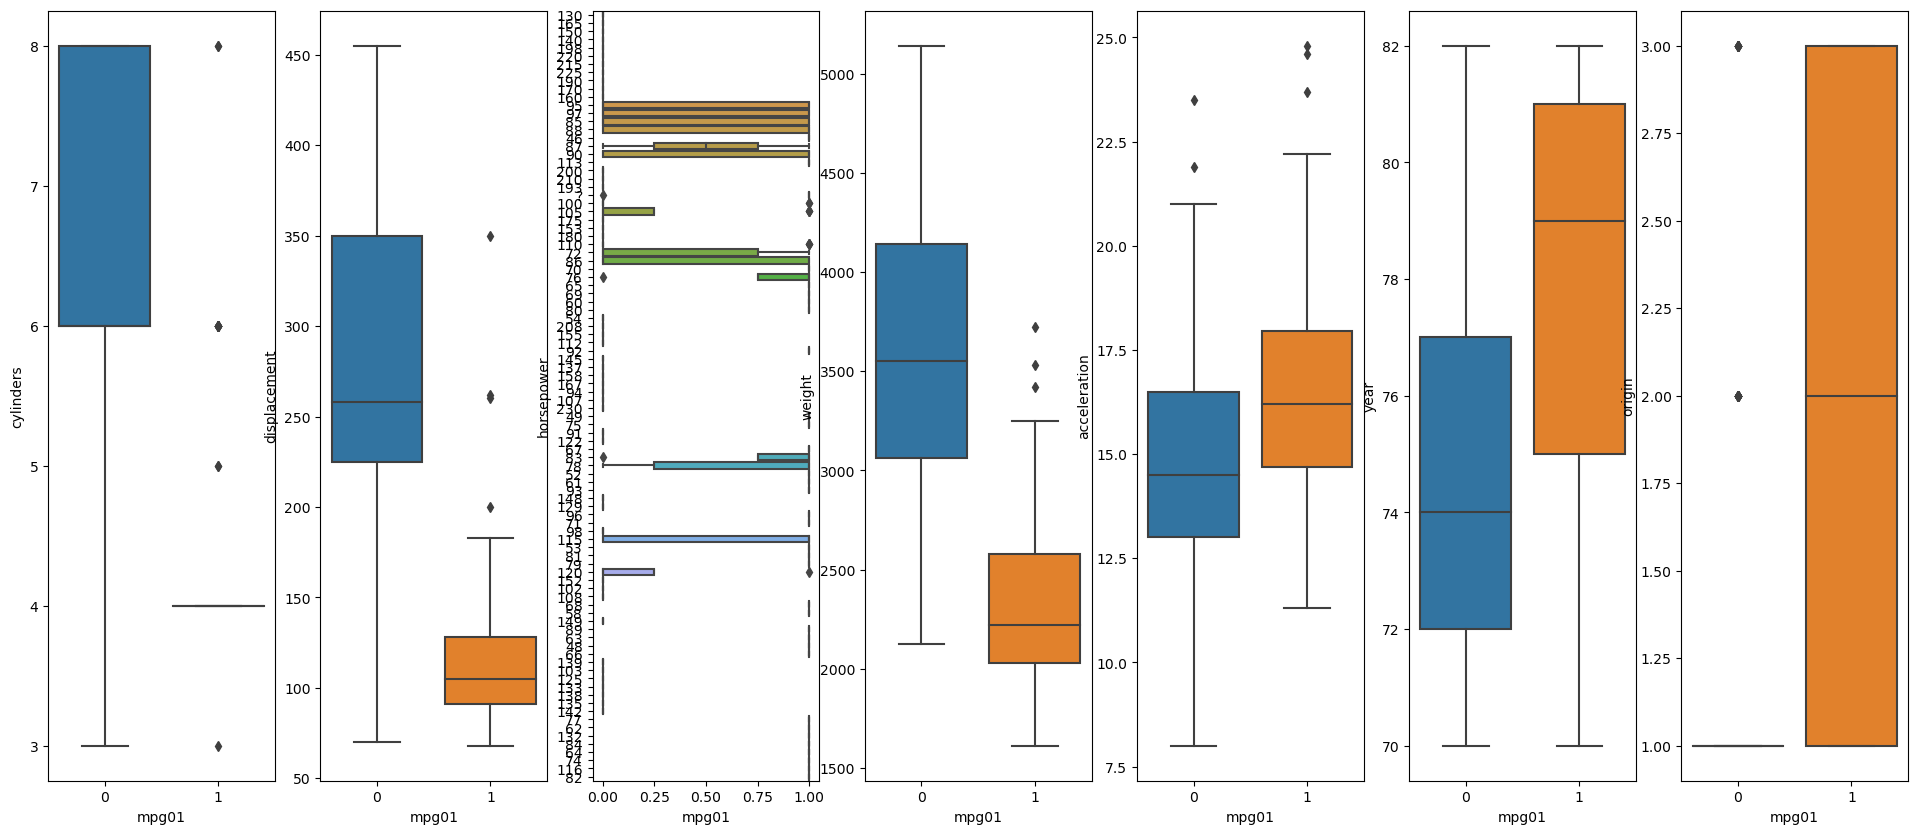

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(24,10))
for i in range(7):
    sns.boxplot(data=auto, x='mpg01', y=feature[i], ax=ax[i])
plt.show()

## (c)
使用sklearn的train_test_split模組將資料集照比例(0.8:0.2)分為training與test兩資料集。

In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(auto, test_size=0.2)

## (d)
使用lda(使用sklearn LinearDiscriminantAnalysis模組)訓練training set中'displacement'、'weight'、'acceleration'三變數，將建構好的模型拿來預測test set中'mpg01'數值。

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf_lda = LDA()
clf_lda.fit(train[['displacement', 'weight','acceleration']], train['mpg01'])
lda_predit = clf_lda.predict(test[['displacement', 'weight','acceleration']])

confusion matrix 結果如下，test error ratio = 10/80 = 0.125

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['mpg01'], lda_predit)

array([[33,  8],
       [ 2, 37]], dtype=int64)

## (e)
這次使用qda來建構模型(使用sklearn QuadraticDiscriminantAnalysis模組)，組建方法則與前面lda相同

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
clf_qda = QDA()
clf_qda.fit(train[['displacement', 'weight','acceleration']], train['mpg01'])
qda_predit = clf_qda.predict(test[['displacement', 'weight','acceleration']])

confusion matrix 結果如下，test error ratio = 8/80 = 0.1

In [42]:
confusion_matrix(test['mpg01'], qda_predit)

array([[36,  5],
       [ 3, 36]], dtype=int64)

## (f)

這次使用qda來建構模型(使用sklearn LogisticRegression模組)，組建方法則與前面lda相同

In [43]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=0).fit(train[['displacement', 'weight','acceleration']], train['mpg01'])
log_predit = clf_log.predict(test[['displacement', 'weight','acceleration']])

confusion matrix 結果如下，test error ratio = 10/80 = 0.125

In [44]:
confusion_matrix(test['mpg01'], log_predit)

array([[34,  7],
       [ 3, 36]], dtype=int64)

## (g)

這次使用naive_bayes來建構模型(使用sklearn GaussianNB模組)，組建方法則與前面lda相同

In [45]:
from sklearn.naive_bayes import GaussianNB
clf_nav = GaussianNB().fit(train[['displacement', 'weight','acceleration']], train['mpg01'])
nav_predit = clf_nav.predict(test[['displacement', 'weight','acceleration']])

confusion matrix 結果如下，test error ratio = 11/80 = 0.1375

In [46]:
confusion_matrix(test['mpg01'], nav_predit)

array([[33,  8],
       [ 3, 36]], dtype=int64)

## (h)

使用KNN來建構模型(使用sklearn KNeighborsClassifier模組)，組建模型方法自變數只加入'weight'，並測試test set分類結果

In [47]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(train[['weight']], train['mpg01'])
    knn_predict = neigh.predict(test[['weight']])
    print('n='+str(i))
    print(confusion_matrix(test['mpg01'], knn_predict))

n=1
[[33  8]
 [ 4 35]]
n=2
[[39  2]
 [ 7 32]]
n=3
[[37  4]
 [ 2 37]]
n=4
[[38  3]
 [ 4 35]]
n=5
[[36  5]
 [ 4 35]]
n=6
[[36  5]
 [ 4 35]]
n=7
[[36  5]
 [ 4 35]]
n=8
[[38  3]
 [ 4 35]]
n=9
[[36  5]
 [ 3 36]]
n=10
[[37  4]
 [ 3 36]]
n=11
[[36  5]
 [ 3 36]]


confusion matrix 結果如下，這裡KNN 3時效果最好，test error ratio = 6/80 = 0.075，